#
# **<p align=center>♪♫ [*...And the Bayes 4 All*](https://youtu.be/HbokBTEBEOE) ♫♪**
___
# [$$\color{white}P({\color{red}R}|{\color{brown}M}) = \frac{P({\color{red}R})}{P({\color{brown}M})} \cdot P({\color{brown}M}|{\color{red}R}) $$](https://en.wikipedia.org/wiki/Bayes%27_theorem)

where

#### $$\underset{\text{a posteriori}}{\underbrace{P({\color{brown}M})}} = \underset{\text{a priori}}{\underbrace{P({\color{red}R})}}\cdot \underset{\text{true positives}}{\underbrace{P({\color{brown}M|{\color{red}R}})}} + \underset{\text{au contraire}}{\underbrace{P({\color{red}\bar{R}})}}\cdot\underset{\text{false positives}}{\underbrace{P({\color{brown}M|{\color{red}\bar{R}}})}}$$
___

## **Null hypothesis**: "*There's **no person** at the zebra crossing. **Whatsoever.***"
</p>

[False positives](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)
(or a **type I error**):
* *Detecting a person* $\rightarrow$ rejecting the (**$\color{red}\mathbf{true}$**) null hypothesis

[False negatives](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)
(or a **type II error**): 
* *Overlooking a person*  $\rightarrow$ failing to reject the (**$\color{red}\mathbf{false}$**) null hypothesis

[False positives - again](https://en.wikipedia.org/wiki/Type_III_error#Mosteller) 
(or a **type III error**):
* *Detecting [a zebra crossing the road as a person](https://upload.wikimedia.org/wikipedia/commons/7/74/Zebra_crossing_road.jpg)* $\rightarrow$ rejecting the (**$\color{red}\mathbf{true}$**) null hypothesis for the **wrong** reason
* $\ldots$ and now, finally, both [*epistemic and aleatoric*](https://arxiv.org/pdf/2406.02543) errors are on a table!
* Unless $\ldots$ there were many "**images of persons disguised as a zebra crossing the road**" in the learning data set (see *e.g.* [those guys on the **Bucket of Blood Street** in Holbrook, AZ](https://sl.bing.net/iyW34dU194K) [and *cf.* [a closer to reality version too](https://maps.app.goo.gl/kSP7V8MULqSVGfEo8)])

In [1]:
def Bayes_formula(a_priori: float, false_positives: float, true_positives: float) -> float:
    au_contraire = 1 - a_priori
    positives = true_positives * a_priori + false_positives * au_contraire
    a_posteriori = true_positives * a_priori/positives
    return a_posteriori

A randomly matching epigraph...
+ **Skipper**:    Kowalski, what's our trajectory?                            
+ **Kowalski**:   Ninety-five percent certain we're still doomed.             [1 - 1/20]
+ **Skipper**:    And the, uh... other five percent?                          [1/20]
+ **Kowalski**:   [${\color{lighblue}{\textbf{¡¡¡Adventure and glory like no penguins have ever seen before!!!}}}$](https://youtu.be/5uXmPvFWtMg?t=141)

In [2]:
from sys import argv      # .\Bayes4all.py '(1/100, 1/100, 1 - 1/100)' # a.k.a fifty-fifty
a_priori, false_positives, true_positives = (1/100, 1/100, 1 - 1/100)
## Run, Bayes! Run!
a_posteriori = a_priori
print(f'Given the false positives probability = {false_positives} and the occurrence probability = {a_priori}, the chances are:')
while(a_posteriori < 1 - 1/10_000):
    a_posteriori = Bayes_formula(a_posteriori, false_positives, true_positives)
    print(f'{100 * a_posteriori:.6g}%')

Given the false positives probability = 0.01 and the occurrence probability = 0.01, the chances are:
50%
99%
99.9898%
99.9999%


# <p align = "center">Examples</p>
***
## A **single** (almost) perfect classifier:
For false positives rate = 0.0001 and occurrence probability = 0.001 the chances are:
- 90.92%
***
## A **tandem** of (rather) mediocre classifiers:
For false positives rate = 0.01 and occurrence probability = 0.001 the chances are:
- 9.099%
- 90.92%

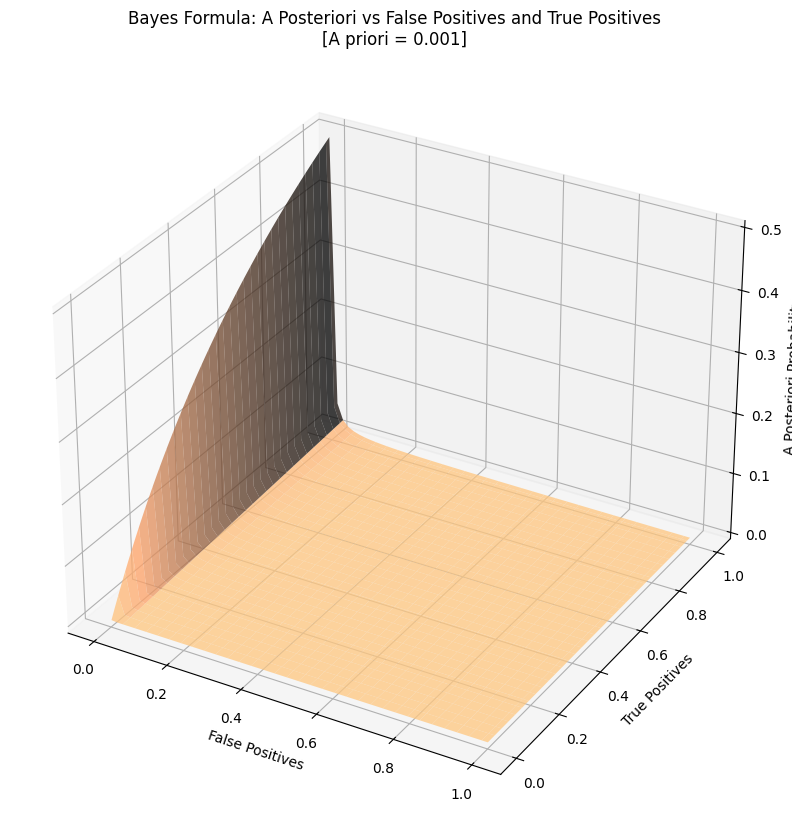

In [3]:
# Prompt: "A 3D diagrams that shows dependence of a_posteriori with respect to
# false_positives and true_positives parameters in the Bayes_formula
# with a_posteriori fixed at 0.001" + some adjustments
# Reference :)
# https://www.smbc-comics.com/comic/how-math-works

import numpy as np
import matplotlib.pyplot as plt

a_priori = 0.001
# Create meshgrid for false_positives and true_positives
false_positives, true_positives = np.linspace(0.001, 1.0, 64), np.linspace(0.001, 1.0, 64)
mesh = np.meshgrid(false_positives, true_positives)

# Calculate a_posteriori for each combination
samples = np.meshgrid(false_positives, true_positives)
a_posteriori_mesh = Bayes_formula(a_priori, samples[0], samples[1])

# Create 3D plot
ax = plt.figure(figsize = (8, 8)).add_subplot(111, projection = '3d'); plt.tight_layout()
surf = ax.plot_surface(mesh[0], mesh[1], a_posteriori_mesh, cmap = 'copper_r', alpha = 0.75)

ax.set_xlabel('False Positives'); ax.set_ylabel('True Positives'); ax.set_zlabel('A Posteriori Probability')
ax.set_title(f'Bayes Formula: A Posteriori vs False Positives and True Positives\n[A priori = {a_priori}]')
plt.show()